In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# ADA Final Exam

## Deadline
Thursday February 02, 2017 at 11:15AM

## Important Notes
* Make sure you upload your iPython Notebook [with this form](https://script.google.com/macros/s/AKfycbxOi0MpR3WnGXrXjx85Q5W7ENteJI3gpD4_VL3zfZaX3CHnCDQ/exec) at the end of the exam, with all the cells already evaluated.
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution
you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset.
Do not obsess over small details at the beginning, and try to complete as many tasks as possible during the first 2 hours. 
Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Remember, this is not a homework assignment -- **no teamwork allowed!**

## Goal
Today you will wear the hat of a data scientist who studies the Social Media presence of the two
major Swiss universities: EPFL and ETHZ. You will be given multiple tasks, ranging from data analysis
to machine learning, all aimed at spotting key differences between the two universities.

## Data Description
In this repository you can find two `.json` files containing the full Twitter history of the 
[EPFL_en](https://twitter.com/epfl_en) and [ETH_en](https://twitter.com/eth_en) accounts.
On the Twitter developers site you can read a full description of the [Tweet objects](https://dev.twitter.com/overview/api/tweets)
contained in the files. We recommend you to read carefully the documentation, in order to understand how useful each attribute could be for the assigned tasks.
Load the two files into Pandas dataframes, and then generate two additional dataframes filtered by `id % 10 == LAST_DIGIT_OF_YOUR_SCIPER_NUMBER`.
Whenever asked, perform the task on both the full dataframes and the downsampled ones, discussing what is the impact of the downsampling (if any).

## Tasks
1. Perform **data wrangling** as you see fit on *both the full and downsampled dataframes*, justifying your choices.


We will use only the following field of the Tweet object :
* Text : the text of the tweet
* Id : id of the tweet
* Favorite counts : number of likes
* Hashtags : list of hashtags in the tweet
* (Mention : list of name mention in the tweet)
* Retweet counts: number of retweet
* Created_at : date of the tweet

In [5]:
# Load tweets into a dataframe
tweets = pd.read_json('eth_en.json')
tweets.head()

,contributors,truncated,text,is_quote_status,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,...,possibly_sensitive,lang,created_at,in_reply_to_status_id_str,place,retweeted_status,extended_entities,quoted_status_id,quoted_status,quoted_status_id_str
0,NaN,False,From digitally designing to testing on the slo...,False,NaN,825025633579212800,1,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,...,0.0,en,2017-01-27 17:00:13+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,False,RT @materialsviews: Learn more on Microscale #...,False,NaN,824986239543738368,0,"<a href=""http://www.falcon.io"" rel=""nofollow"">...",False,NaN,...,0.0,en,2017-01-27 14:23:41+00:00,NaN,NaN,"{'contributors': None, 'truncated': False, 'te...",NaN,NaN,NaN,NaN
2,NaN,False,"RT @LudiciousFest: Severin Klingler, Ph.D. can...",False,NaN,824632013990793217,0,"<a href=""http://www.falcon.io"" rel=""nofollow"">...",False,NaN,...,NaN,en,2017-01-26 14:56:07+00:00,NaN,NaN,"{'contributors': None, 'truncated': True, 'tex...",NaN,NaN,NaN,NaN
3,NaN,False,RT @NatRevMCB: Now online Review by Ulrike Kut...,False,NaN,824589837479149570,0,"<a href=""http://www.falcon.io"" rel=""nofollow"">...",False,NaN,...,NaN,en,2017-01-26 12:08:32+00:00,NaN,NaN,"{'contributors': None, 'truncated': True, 'tex...",NaN,NaN,NaN,NaN
4,NaN,False,"RT @aaas: Experts from @MIT, @ETH_en and more ...",False,NaN,824307723814703106,0,"<a href=""http://twitter.com/download/android"" ...",False,NaN,...,0.0,en,2017-01-25 17:27:30+00:00,NaN,NaN,"{'contributors': None, 'truncated': True, 'tex...",NaN,NaN,NaN,NaN


In [6]:
# Load tweets into a dataframe
tweets.columns

Index(['contributors', 'truncated', 'text', 'is_quote_status',
       'in_reply_to_status_id', 'id', 'favorite_count', 'source', 'retweeted',
       'coordinates', 'entities', 'in_reply_to_screen_name',
       'in_reply_to_user_id', 'retweet_count', 'id_str', 'favorited', 'user',
       'geo', 'in_reply_to_user_id_str', 'possibly_sensitive', 'lang',
       'created_at', 'in_reply_to_status_id_str', 'place', 'retweeted_status',
       'extended_entities', 'quoted_status_id', 'quoted_status',
       'quoted_status_id_str'],
      dtype='object')

In [7]:
# Keep only the columns we want
columns = ['id', 'created_at', 'text', 'entities', 'retweet_count', 'favorite_count']
tweets = tweets[columns]

# Set the index as the id
tweets = tweets.set_index('id', drop=True)

# Transform the created_at into a dateframe column
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

tweets.head()

,created_at,text,entities,retweet_count,favorite_count
id,,,,,
825025633579212800,2017-01-27 17:00:13+00:00,From digitally designing to testing on the slo...,"{'symbols': [], 'user_mentions': [], 'hashtags...",0,1
824986239543738368,2017-01-27 14:23:41+00:00,RT @materialsviews: Learn more on Microscale #...,"{'symbols': [], 'user_mentions': [{'id': 18305...",4,0
824632013990793217,2017-01-26 14:56:07+00:00,"RT @LudiciousFest: Severin Klingler, Ph.D. can...","{'symbols': [], 'user_mentions': [{'id': 24548...",5,0
824589837479149570,2017-01-26 12:08:32+00:00,RT @NatRevMCB: Now online Review by Ulrike Kut...,"{'symbols': [], 'user_mentions': [{'id': 41293...",27,0
824307723814703106,2017-01-25 17:27:30+00:00,"RT @aaas: Experts from @MIT, @ETH_en and more ...","{'symbols': [], 'user_mentions': [{'id': 17292...",5,0


In [8]:
# Take care of the hashtags
tweets['hashtags'] = tweets.entities.apply(lambda x: x.get('hashtags'))
tweets.hashtags = tweets.hashtags.apply(lambda x: [y['text'] for y in x])

# take care of mentions
tweets['mentions'] = tweets.entities.apply(lambda x: x.get('user_mentions'))
tweets['mentions'] = tweets['mentions'].apply(lambda x: [y['name'] for y in x])

# Drop entities column
tweets = tweets.drop(columns='entities')
tweets.head()

,created_at,text,retweet_count,favorite_count,hashtags,mentions
id,,,,,,
825025633579212800,2017-01-27 17:00:13+00:00,From digitally designing to testing on the slo...,0,1,"[skis, engineering]",[]
824986239543738368,2017-01-27 14:23:41+00:00,RT @materialsviews: Learn more on Microscale #...,4,0,"[AdditiveManufacturing, Metals]","[Wiley Materials, ETH Zurich]"
824632013990793217,2017-01-26 14:56:07+00:00,"RT @LudiciousFest: Severin Klingler, Ph.D. can...",5,0,[],"[Ludicious, ETH Zurich]"
824589837479149570,2017-01-26 12:08:32+00:00,RT @NatRevMCB: Now online Review by Ulrike Kut...,27,0,[nuclearenvelope],"[NatureRevMolCellBiol, ETH Zurich]"
824307723814703106,2017-01-25 17:27:30+00:00,"RT @aaas: Experts from @MIT, @ETH_en and more ...",5,0,[AAASmtg],"[AAAS, MIT, ETH Zurich]"


2. By means of **descriptive statistics and plots**, show the different volume of engagement (e.g., number of favorites and retweets) that the accounts generate.
Compute the results per year (to highlight the growth trends), per month (to figure out if the accounts follow the academic year), and per hour of the day (to
find out if tweets posted at a certain hour get more attention). Similarly, break down the results per hashtag (e.g., #EPFLisAwesome) -- are there hashtags that
are used more often than others, and that obtain more engagement than others?

We will first look at the distribution of the retweet

In [68]:
tweets['retweet_count'].sort_values(ascending=False)

id
757912693076553729    6095
746288060044816384    1641
232350103317409792     810
96557776830074883      255
431158559628197888     134
                      ... 
308879493240602624       0
695328982909247488       0
307859218663358467       0
307431134516637696       0
8773884572606464         0
Name: retweet_count, Length: 3208, dtype: int64

We can see that there is one big outlier we will check the tweet :

In [70]:
tweets.loc[757912693076553729].text

"RT @solarimpulse: BREAKING: we flew 40'000km without fuel. It's a first for energy, take it further! #futureisclean https://t.co/JCvKTDBVZx"

It's the tweet when the solar impusle completed is world trip. It was followed a lot on social media.

Now we will analyse the distribution of favorite.

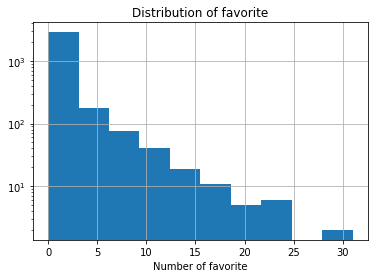

In [74]:
plt.figure()
tweets['favorite_count'].hist(log=True)
plt.title("Distribution of favorite")
plt.xlabel("Number of favorite")
plt.show()

We can see that it is an exponential ditribution as it's a line in a log-plot.

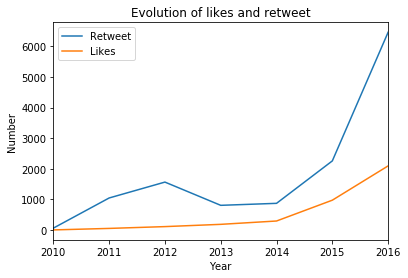

In [99]:
# Year
tweets['year'] = pd.DatetimeIndex(tweets['created_at']).year
year_stats = tweets.groupby('year').agg('sum')[['retweet_count', 'favorite_count']]
# We will not take year 2017 into account as we are only in january
year_stats = year_stats.drop(index=2017)

plt.figure()
year_stats.retweet_count.plot(label="Retweet")
year_stats.favorite_count.plot(label="Likes")
plt.title("Evolution of likes and retweet")
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend()
plt.show()

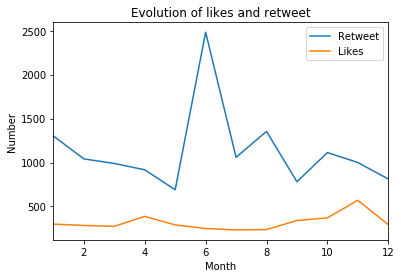

In [98]:
# Month
tweets['month'] = pd.DatetimeIndex(tweets['created_at']).month
month_stat = tweets.groupby('month').agg('sum')[['retweet_count', 'favorite_count']]

plt.figure()
month_stat.retweet_count.plot(label="Retweet")
month_stat.favorite_count.plot(label="Likes")
plt.title("Evolution of likes and retweet")
plt.xlabel("Month")
plt.ylabel("Number")
plt.legend()
plt.show()

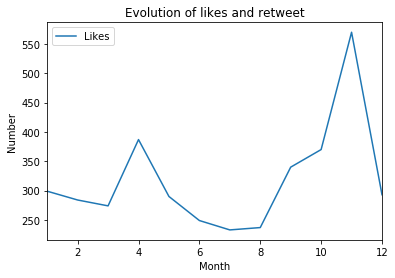

In [93]:
plt.figure()
month_stat.favorite_count.plot(label="Likes")
plt.title("Evolution of likes and retweet")
plt.xlabel("Month")
plt.ylabel("Number")
plt.legend()
plt.show()

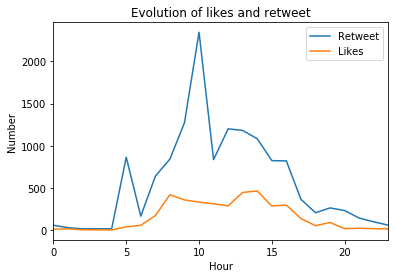

In [94]:
# Hour
tweets['hour'] = pd.DatetimeIndex(tweets['created_at']).hour
hour_stats = tweets.groupby('hour').agg('sum')[['retweet_count', 'favorite_count']]

plt.figure()
hour_stats.retweet_count.plot(label="Retweet")
hour_stats.favorite_count.plot(label="Likes")
plt.title("Evolution of likes and retweet")
plt.xlabel("Hour")
plt.ylabel("Number")
plt.legend()
plt.show()

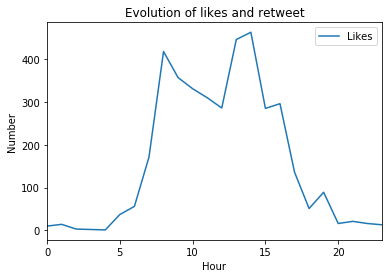

In [95]:
plt.figure()
hour_stats.favorite_count.plot(label="Likes")
plt.title("Evolution of likes and retweet")
plt.xlabel("Hour")
plt.ylabel("Number")
plt.legend()
plt.show()

We can see that the number of retweet depend highly on the tweet, if the tweet tell a big news it's highly retweeted. To see the real trend we have to look at the likes. We can see that they are constantly increasing since 2010, they follow the academic year (there are fewer likes in june, july, august). Finally we can see that the twee who get the most like are posted in the morning or right after the lunch break (at 1 or 2 pm)

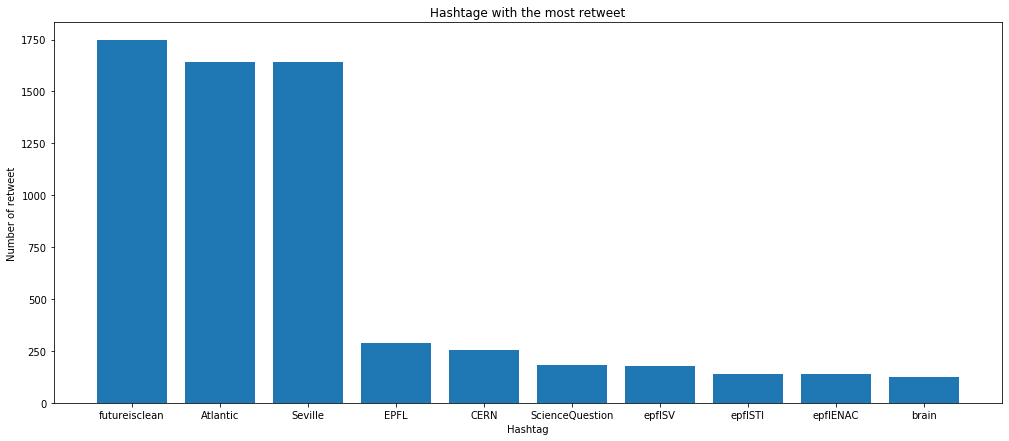

In [107]:
# by hashtag
# We first explode the hashtag column
hashtag_stats = tweets.explode(column='hashtags')

# Look at the engagement by hashtag
hashtag_stats_engagement = hashtag_stats.groupby('hashtags').agg('sum')[['retweet_count', 'favorite_count']]

# Number of retweet
hashtag_stats_retweet = hashtag_stats_engagement['retweet_count'].sort_values(ascending=False)[:10]
plt.figure(figsize=(17,7))
plt.bar(x=hashtag_stats_retweet.index, height=hashtag_stats_retweet)
plt.title("Hashtag with the most retweet")
plt.xlabel("Hashtag")
plt.ylabel("Number of retweet")
plt.show()

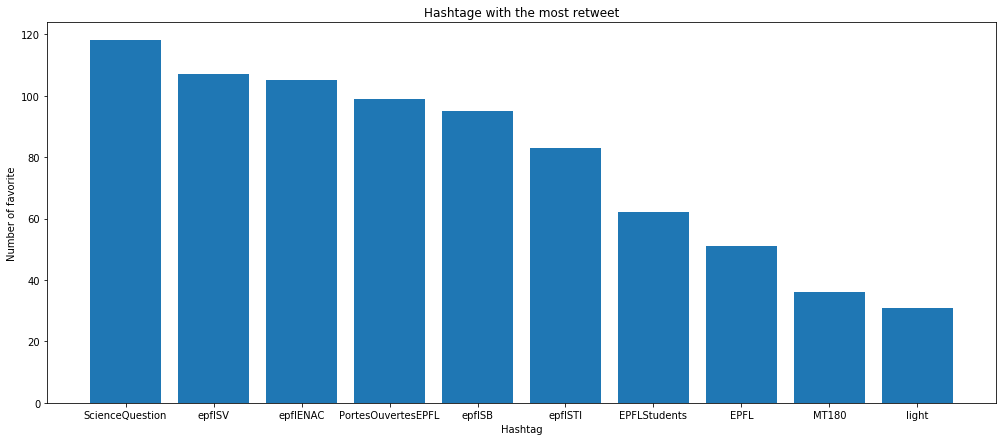

In [108]:
# Number of favorite
hashtag_stats_fav = hashtag_stats_engagement['favorite_count'].sort_values(ascending=False)[:10]
plt.figure(figsize=(17,7))
plt.bar(x=hashtag_stats_fav.index, height=hashtag_stats_fav)
plt.title("Hashtag with the most favorite")
plt.xlabel("Hashtag")
plt.ylabel("Number of favorite")
plt.show()

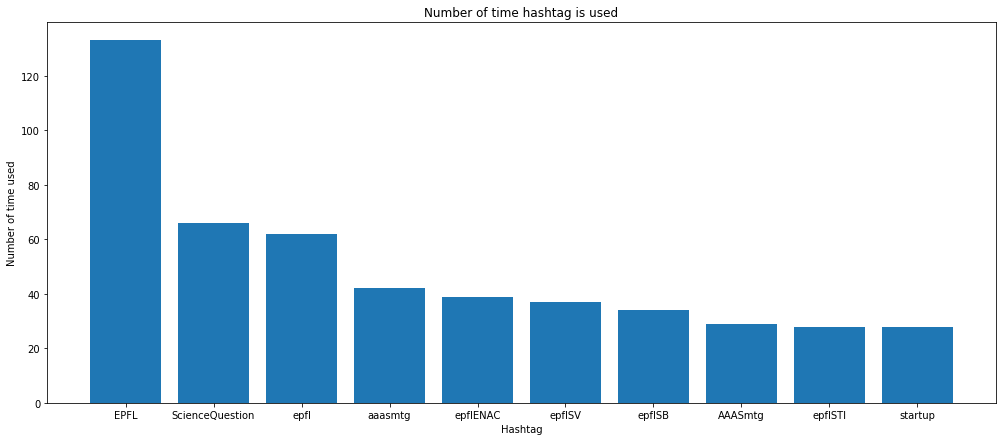

In [109]:
# Finally count the number of time each hashtag is used
hashtag_stats_count = hashtag_stats.groupby('hashtags').agg('count')['favorite_count']
hashtag_stats_count = hashtag_stats_count.sort_values(ascending=False)[:10]
plt.figure(figsize=(17,7))
plt.bar(x=hashtag_stats_count.index, height=hashtag_stats_count)
plt.title("Number of time hashtag is used")
plt.xlabel("Hashtag")
plt.ylabel("Number of time used")
plt.show()

3. Train a **regressor** (*both on the full and downsampled dataframes*) to predict how many retweets a certain Tweet will get. You are allowed to use as features
only the attributes in the JSON objects (and any derivative that you can build locally) -- you are not allowed to download additional data from the Internet
to boost your model. Discuss the obtained results, explain the performance on the downsampled dataframes, and briefly describe what additional features you
would have used if you had access to the full Twitter API.

  *HINT*: for a more powerful model, consider time (and how the audience of the accounts grew throughout the years...)

4. Find the **topics** that are covered most of the time by the two Twitter accounts (*both on the full and downsampled dataframes*). You can run topic modeling and/or
implement your own NLP pipeline. Do the topics change significantly over time? Is there an overlap with the hashtags used in the tweets?

  *HINT*: clustering Tweets by some features (e.g., hashtags) will give you better results with topic modeling.